In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import re

In [29]:
Data = pd.read_csv("comments.csv")

In [30]:
Data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
Data.drop(columns=["CommentId", "VideoId"] , inplace=True)

In [32]:
Data.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
Data.shape

(1000, 13)

In [26]:
def clean_text(text):
    if not isinstance(text, str):
        return ''
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [27]:
Data['Text'] = Data['Text'].apply(clean_text)

In [11]:
Vector_Model = SentenceTransformer('all-MiniLM-L6-v2')

In [12]:
vectors = Vector_Model.encode(Data['Text'])

In [13]:
vectors

array([[-0.02409831,  0.0117343 ,  0.01624406, ...,  0.026366  ,
        -0.06226461, -0.00301467],
       [ 0.00782822, -0.00218646, -0.10788008, ...,  0.01531437,
         0.08106051, -0.0122317 ],
       [-0.02353152,  0.09362686, -0.03101512, ..., -0.03767394,
        -0.02474398,  0.02078765],
       ...,
       [-0.04252236,  0.02875999,  0.04280568, ...,  0.05347891,
         0.04602199, -0.00772228],
       [-0.01899581,  0.0645903 , -0.01873962, ...,  0.01621408,
         0.0293364 , -0.045318  ],
       [-0.02376318, -0.04000741,  0.05939645, ...,  0.09508798,
         0.04774858,  0.00927763]], dtype=float32)

In [14]:
max_words = 5000  # Maximum number of words to consider in vocabulary
max_len = 100     # Maximum length of each comment (in tokens)
embedding_dim = 100  # Dimension of word embeddings

In [15]:
Label_columns = Data.select_dtypes(include=['bool']).columns

In [16]:
Label_columns

Index(['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
       'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic',
       'IsReligiousHate', 'IsRadicalism'],
      dtype='object')

In [33]:
Labels = Data[Label_columns].astype(int).values
texts = Data['Text'].values

In [34]:
Labels

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
embeddings = Vector_Model.encode(texts, show_progress_bar=True)

Batches: 100%|██████████| 32/32 [00:07<00:00,  4.15it/s]


In [36]:
X_train, X_val, y_train, y_val = train_test_split(embeddings, Labels, test_size=0.2, random_state=42)

In [42]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(embeddings.shape[1],)),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(Label_columns), activation='sigmoid')
])

d:\PYTHON\GENERATIVE AI\GENAI\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=200,
                    batch_size=16,
                    verbose=1)

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7188 - loss: 0.0021 - val_accuracy: 0.6950 - val_loss: 0.6974
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7071 - loss: 0.0025 - val_accuracy: 0.6950 - val_loss: 0.6981
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6979 - loss: 0.0032 - val_accuracy: 0.7500 - val_loss: 0.7005
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7319 - loss: 0.0016 - val_accuracy: 0.6750 - val_loss: 0.7058
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7373 - loss: 0.0030 - val_accuracy: 0.6700 - val_loss: 0.7065
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7552 - loss: 0.0044 - val_accuracy: 0.8000 - val_loss: 0.6393
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7724 - loss: 0.0058 - val_accuracy: 0.8600 - val_loss: 0.6486
Epoch 8/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7873 - loss: 0.0134 - val_accuracy: 0.6850 - v

In [52]:
y_pred = model.predict(X_val)
y_pred_binary = (y_pred > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


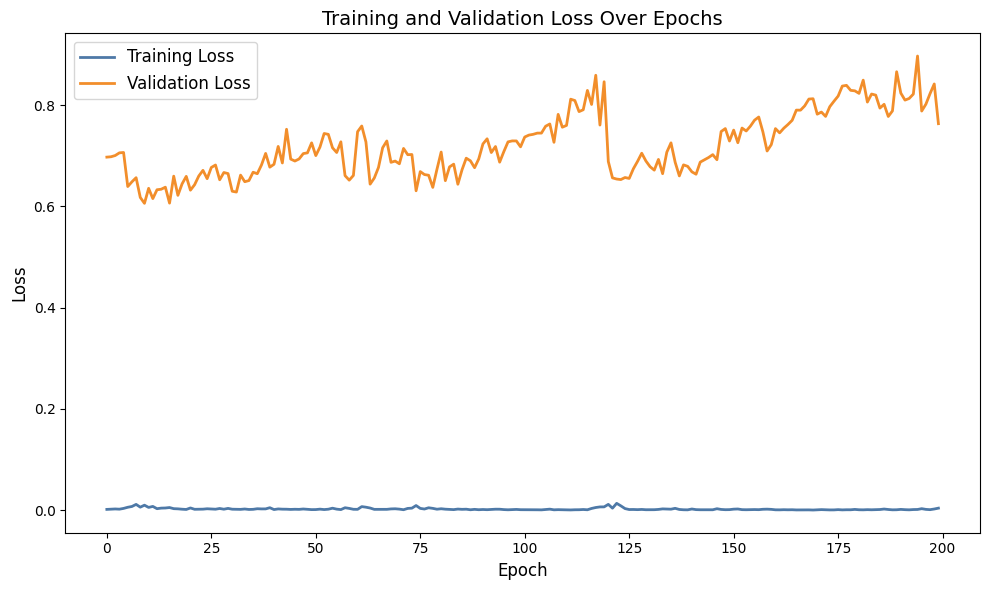

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='#4e79a7', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='#f28e2b', linewidth=2)
plt.title('Training and Validation Loss Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [54]:
model.save('comment_classifier.h5')